In [9]:
import matplotlib.pyplot as plt
import matplotlib.colors as color
import numpy as np
import random

In [10]:
ablty=14*15
p=100

7528.629929622641

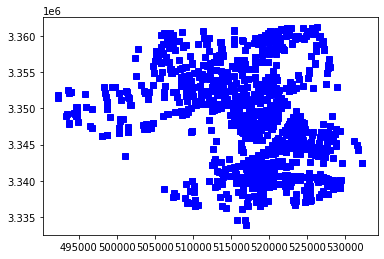

In [11]:
# demandCoordinates = [(88, 16), (25, 76), (69, 13), (73, 56), (80, 100), (22, 92), (32, 84), (73, 46), (
#         29, 10), (92, 32), (44, 44), (55, 26), (71, 27), (51, 91), (89, 54), (43, 28), (40, 78), (60, 66)]
# 
origin=0
merged=1
if origin:
    data=np.load("杭州xyn.npy")
else:
    data=np.load("杭州mergedXY.npy")

# print(data)
demandCoordinates=[(data[i][0],data[i][1]) for i in range(data.shape[0])]
size=data.shape[0]
q=[random.random()*10 for i in range(size)]
for xy in demandCoordinates:
    plt.plot(xy[0],xy[1],c="b",marker="s")

np.sum(q)

In [12]:
A=[(i,j) for i in range(size) for j in range(size)]
N=[i for i in range(size)]
geo_dis={(i,j):np.hypot(demandCoordinates[i][0]-demandCoordinates[j][0],demandCoordinates[i][1]-demandCoordinates[j][1]) for i,j in A}   #几何距离
if origin:
    od=np.load("data杭州.npy")
else: 
    od=np.load("杭州mergedOD.npy")   #np格式的od矩阵
od_dis={(i,j):od[i][j] for i,j in A}  #字典格式的od矩阵
dis=od_dis

In [13]:
from gurobipy import Model, GRB , quicksum

In [14]:
mdl=Model("p-center")


In [15]:
x=mdl.addVars(A,vtype=GRB.CONTINUOUS,ub=1,lb=0)
# x=mdl.addVars(A,vtype=GRB.BINARY)
n=mdl.addVars(N,vtype=GRB.INTEGER)
mdl.update()

In [16]:
mdl.ModelSense=GRB.MINIMIZE
mdl.setObjective(quicksum(x[i,j]*dis[i,j] for i,j in A))

In [17]:
mdl.addConstrs(quicksum(x[i,j] for j in N)== 1 for i in N);

In [18]:
mdl.addConstr(quicksum(n[i] for i in N )== p);

In [19]:
mdl.addConstrs((quicksum(q[i]*x[i,j] for i in N)<=n[j]*ablty )for j in N);

In [20]:
mdl.optimize()

Gurobi Optimizer version 9.5.1 build v9.5.1rc2 (mac64[arm])
Thread count: 8 physical cores, 8 logical processors, using up to 8 threads
Optimize a model with 2907 rows, 2112662 columns and 4225324 nonzeros
Model fingerprint: 0x3fa75929
Variable types: 2111209 continuous, 1453 integer (0 binary)
Coefficient statistics:
  Matrix range     [5e-03, 2e+02]
  Objective range  [6e-01, 5e+04]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 1e+02]
Found heuristic solution: objective 2.102343e+07
Presolve removed 1 rows and 1 columns
Presolve time: 2.67s
Presolved: 2906 rows, 2112661 columns, 4225322 nonzeros
Variable types: 2111209 continuous, 1452 integer (0 binary)

Starting sifting (using dual simplex for sub-problems)...

    Iter     Pivots    Primal Obj      Dual Obj        Time
       0          0     infinity      0.0000000e+00      5s

Sifting complete


Root relaxation: objective 0.000000e+00, 1452 iterations, 0.50 seconds (0.45 work units)
Total elapsed time = 5.09s

   

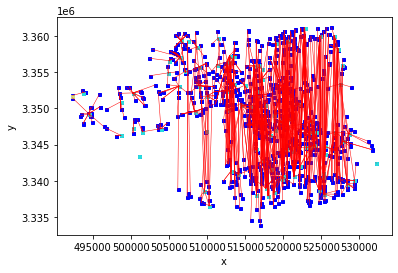

In [21]:
# 画所有点及标注需求
markersize=3
linewidth=0.5
for i in N:
    xy=demandCoordinates[i]
    plt.plot(xy[0],xy[1],c="b",marker="s",markersize=markersize)
    #plt.text(xy[0],xy[1],f"{q[i]}")

# 画需求量
for i in N:
    if (n[i].x>0):
        xy=demandCoordinates[i]
        col=plt.cm.rainbow
        nMax=0.0
        for ni in N:
            # print(type(n[ni].x),n[ni].x,type(nMax))
            if n[ni].x>nMax:
                nMax=n[ni].x
        norm=color.Normalize(vmax=round(nMax)+1,vmin=0)
        plt.plot(xy[0],xy[1],marker="s",color=col(norm(n[i].x)),markersize=markersize)
        # plt.text(xy[0]-5,xy[1]-5,f"{n[i].x}",color="b")
        

# 画供应线
for i,j in A:
    if x[i,j].x>0.0:
        demandCoordinates[i][0],demandCoordinates[i][1]
        demandCoordinates[j][0],demandCoordinates[j][1]
        plt.plot([demandCoordinates[i][0],demandCoordinates[j][0]],[demandCoordinates[i][1],demandCoordinates[j][1]],color="r",linewidth=linewidth)



plt.xlabel("x")
plt.ylabel("y")
plt.show()
    

In [ ]:
sum=0
for i in N:
    print(round(n[i].x),end=",")
    sum=sum+n[i].x
sum

13,1,1,1,1,0,1,1,0,0,1,1,1,0,0,0,0,0,0,1,0,1,0,76,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

100.0

In [ ]:
array=np.array([])
for i in N:
    array=np.append(array,n[i].x)
array
np.save("n.npy",array)

array2=np.zeros((size,size))
for i,j in A:
    array2[i,j]=x[i,j].x
np.save("x.npy",array2)

In [ ]:
test=[(geo_dis[i,j]-od_dis[i,j]>10000)&(od_dis[i,j]!=0) for i,j in A]
test.count(True)

243818

In [ ]:
test1=[(geo_dis[i,j]>od_dis[i,j])&(od_dis[i,j]!=0) for i,j in A]
test1.count(True)

2061846

In [ ]:
od=np.load("data杭州.npy") 
for i,j in A:
    if(i!=j):
        if(od[i][j]==0):
            od[i][j]=np.inf
xy=np.load("杭州xy.npy")
geo_dis={(i,j):np.hypot(demandCoordinates[i][0]-demandCoordinates[j][0],demandCoordinates[i][1]-demandCoordinates[j][1]) for i,j in A }
len(geo_dis)

10214416

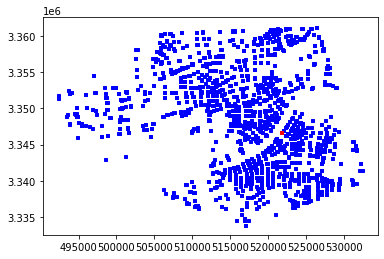

In [ ]:
markersize=3
linewidth=0.5
for i in N:
    xy=demandCoordinates[i]
    plt.plot(xy[0],xy[1],c="b",marker="s",markersize=markersize)
    #plt.text(xy[0],xy[1],f"{q[i]}")
xy=demandCoordinates[2333]
plt.plot(xy[0],xy[1],c="r",marker="s",markersize=markersize)

In [ ]:
xy=demandCoordinates[2247]
xy[0],xy[1]

(521200.2324, 3345077.0356)